## Practical Work 3
prepared by Dr. Hattem el-attar

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [66]:
x=np.random.uniform(low=0, high=20, size=300)
y=-1*x+2


#### Plot your data points. 

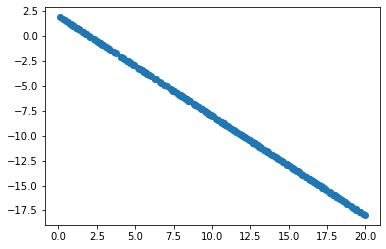

In [67]:
plt.plot(x,y,'o')

#### **Step_1:** Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [68]:
def batchGD(x,y,alpha,iteration):
    theta0,theta1=0,0
    m=len(x)
    thetas=[]
    losses=[]
    hypothesis=[]
    for i in range(iteration):
        thetas.append([theta0,theta1])
        h=theta0+theta1*x
        hypothesis.append(h)
        loss=sum((h-y)**2)/m
        losses.append(loss)
        grad0=sum((h-y))/m
        grad1=(x.T@(h-y))/m
        theta0=theta0-alpha*grad0
        theta1=theta1-alpha*grad1
    
    return thetas,losses,hypothesis,theta0,theta1

In [69]:
thetas,losses,hypothesis,theta0,theta1=batchGD(x,y,0.01,1000)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)



In [70]:
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.999704165675977

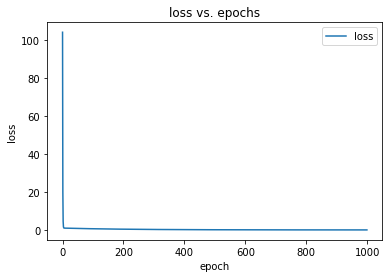

In [71]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('loss vs. epochs')
plt.plot(losses,label='loss')
plt.legend()

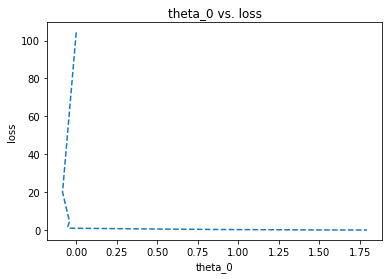

In [72]:
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title('theta_0 vs. loss')
plt.plot(thetas[:,0],losses,'--')

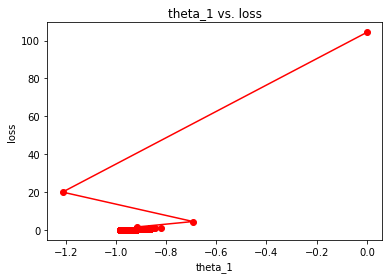

In [73]:
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title('theta_1 vs. loss')
plt.plot(thetas[:,1],losses,'r-o')

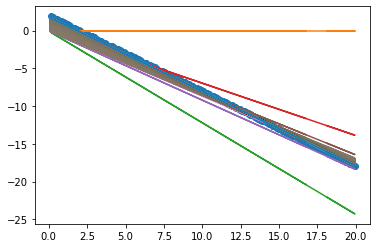

In [74]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis.T) #x with every column from h make one line
plt.show()

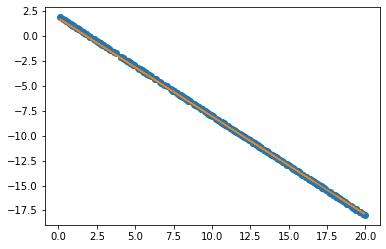

In [75]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis[-1])
plt.show()

### **Step_2:** Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

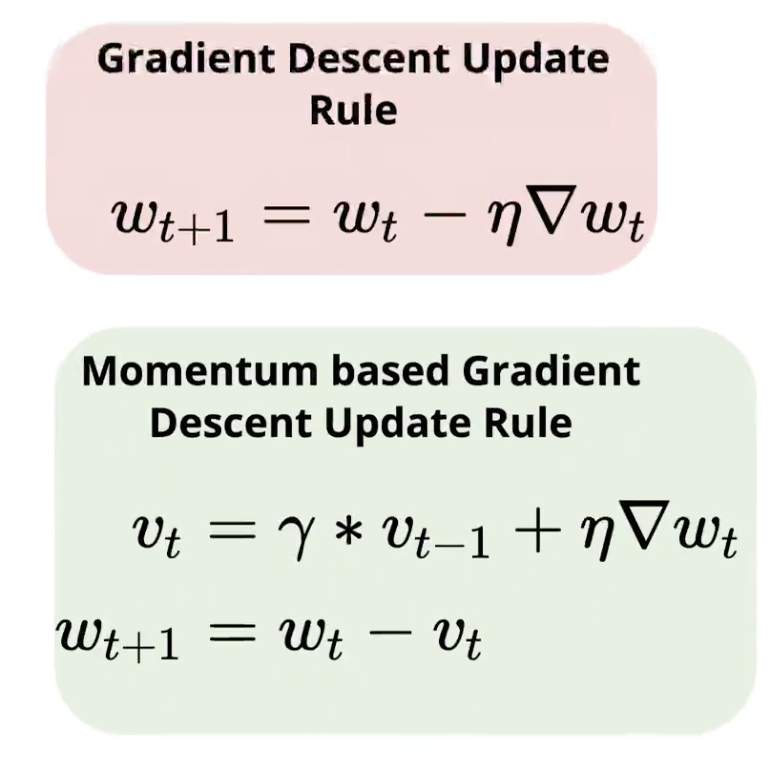

In [76]:
def momentum(x,y,alpha,gamma,iteration):
    theta0,theta1=0,0
    v0,v1=0,0
    m=len(x)
    thetas=[]
    losses=[]
    hypothesis=[]
    for _ in range(iteration):
        thetas.append([theta0,theta1])
        h=theta0+theta1*x
        hypothesis.append(h)
        loss=sum((h-y)**2)/m
        losses.append(loss)
        grad0=sum((h-y))/m
        grad1=(x.T@(h-y))/m
        v0=gamma*v0+alpha*grad0
        v1=gamma*v1+alpha*grad1
        theta0=theta0-v0
        theta1=theta1-v1
        
    return thetas,losses,hypothesis,theta0,theta1     

In [91]:
thetas,losses,hypothesis,theta0,theta1=momentum(x,y,0.01,0.99,500)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)



In [92]:
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.9854732862632849

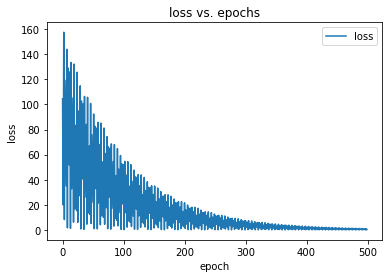

In [93]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('loss vs. epochs')
plt.plot(losses,label='loss')
plt.legend()

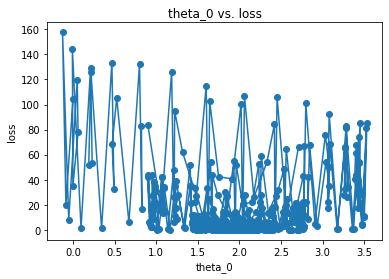

In [94]:
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title('theta_0 vs. loss')
plt.plot(thetas[:,0],losses,'-o')

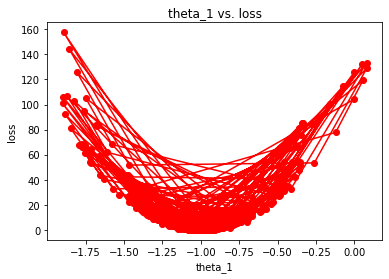

In [95]:
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title('theta_1 vs. loss')
plt.plot(thetas[:,1],losses,'r-o')

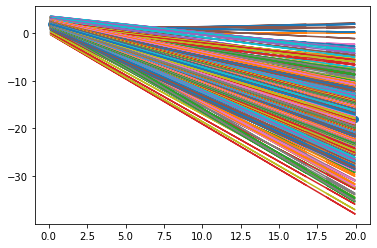

In [96]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis.T) #x with every column from h make one line
plt.show()

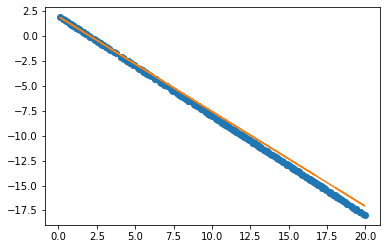

In [97]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis[-1])
plt.show()

#### **Step_3:** Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [99]:
thetas,losses,hypothesis,theta0,theta1=momentum(x,y,0.01,0,500)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.9970246630354327

In [103]:
thetas,losses,hypothesis,theta0,theta1=momentum(x,y,0.01,0.99,500)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.9854732862632849

### **Step_4: **Update your Batch GD for one variable  implementation to be NAG and check your results

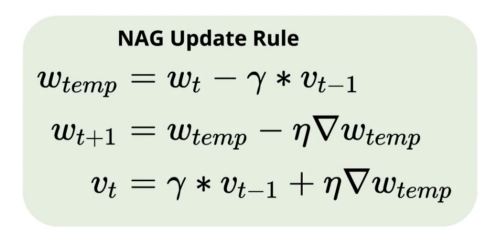

In [106]:
def nag(x,y,alpha,gamma,iteration):
    theta0,theta1=0,0
    v0,v1=0,0
    m=len(x)
    thetas=[]
    losses=[]
    hypothesis=[]
    for _ in range(iteration):
        thetas.append([theta0,theta1])
        temp0=theta0-gamma*v0
        temp1=theta1-gamma*v1
        h=temp0+temp1*x
        hypothesis.append(h)
        loss=sum((h-y)**2)/m
        losses.append(loss)
        grad0=sum((h-y))/m
        grad1=(x.T@(h-y))/m
        theta0=temp0-alpha*grad0
        theta1=temp1-alpha*grad1
        v0=gamma*v0+alpha*grad0
        v1=gamma*v1+alpha*grad1
        
    return thetas,losses,hypothesis,theta0,theta1 

In [110]:
thetas,losses,hypothesis,theta0,theta1=nag(x,y,0.001,0.99,500)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.9998559996425695

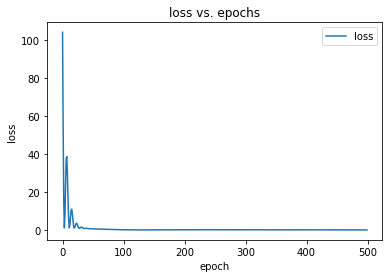

In [111]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('loss vs. epochs')
plt.plot(losses,label='loss')
plt.legend()

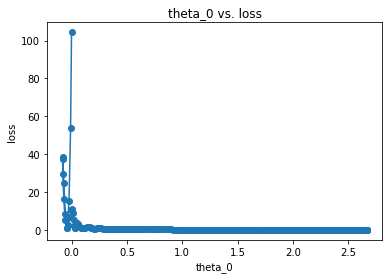

In [113]:
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title('theta_0 vs. loss')
plt.plot(thetas[:,0],losses,'-o')

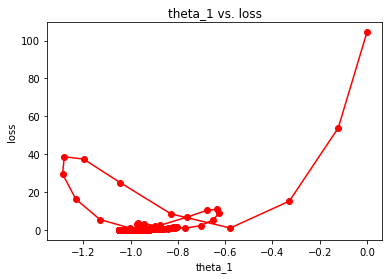

In [112]:
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title('theta_1 vs. loss')
plt.plot(thetas[:,1],losses,'r-o')

## Congratulations 


# thanks doctor for your effort :)